### Q) Aim is to train the linear regression model for predicting the house prices in goregoan city 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [81]:
df = pd.read_csv(r"c:\Users\Admin\Downloads\house_cleaned.csv",encoding='Latin')

In [82]:
df.head(1)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."


In [83]:
df.shape

(964, 20)

In [84]:
df['balcony']=df['balcony'].replace({'3+':3})

<Axes: xlabel='balcony', ylabel='Count'>

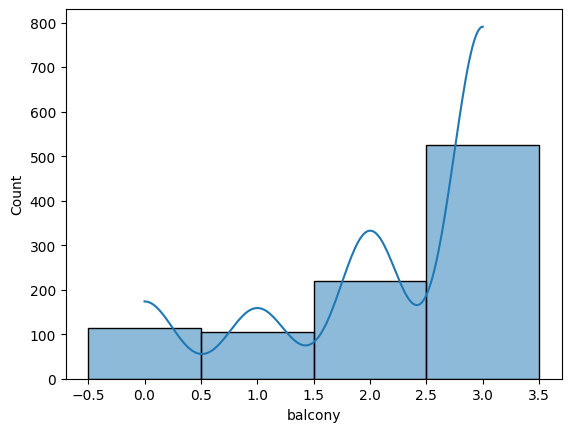

In [85]:
sns.histplot(df['balcony'],kde='true')

In [86]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    386
servant room                                      81
pooja room,study room,servant room,store room     60
others                                            58
pooja room                                        38
pooja room,study room,servant room                33
pooja room,study room,servant room,others         32
store room                                        31
pooja room,servant room                           24
study room                                        19
study room,servant room                           19
servant room,store room                           15
pooja room,study room                             11
pooja room,others                                 11
pooja room,store room                             11
servant room,others                                8
pooja room,store room,study room,servant room      8
servant room,pooja room                            8
pooja room,servant room,store r

In [87]:
additional_dummies = df['additionalRoom'].str.get_dummies(sep=',')
additional_dummies

,not available,others,pooja room,servant room,store room,study room
0,0,0,0,1,0,0
1,0,0,1,1,1,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
959,0,0,1,1,0,1
960,0,0,0,0,0,1
961,0,0,0,1,0,1
962,0,0,0,0,0,1


In [88]:
df = pd.concat([df,additional_dummies],axis=1)
df.head(1)

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,description,furnishDetails,features,rating,not available,others,pooja room,servant room,store room,study room
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3,...,Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",0,0,0,1,0,0


In [89]:
df.drop(['additionalRoom'],axis=1,inplace=True)

In [90]:
df.columns
#floor drop

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'not available', 'others',
       'pooja room', 'servant room', 'store room', 'study room'],
      dtype='object')

In [91]:
df.shape

(964, 25)

In [92]:
df['agePossession'].value_counts()  

agePossession
5 to 10 Year Old      250
1 to 5 Year Old       227
10+ Year Old          216
undefined             142
0 to 1 Year Old       109
Within 6 months         7
Jun 2024                2
Dec 2023                2
Under Construction      2
By 2027                 1
Oct 2024                1
By 2024                 1
Dec 2024                1
Within 3 months         1
Oct 2023                1
Jan 2024                1
Name: count, dtype: int64

In [93]:
# To find the correlation between price and age possesion !!
dummies = pd.get_dummies(df['agePossession'], drop_first=True)
df_dummy = pd.concat([df['price'], dummies], axis=1)
df_dummy.corr()['price'].sort_values()



undefined            -0.222459
10+ Year Old         -0.065153
Jun 2024             -0.038252
By 2024              -0.028784
Jan 2024             -0.025493
Within 3 months      -0.023533
Dec 2024             -0.011630
By 2027              -0.011280
Oct 2023             -0.009810
Under Construction   -0.002834
Oct 2024              0.005874
Dec 2023              0.008361
Within 6 months       0.031519
5 to 10 Year Old      0.051905
1 to 5 Year Old       0.147974
price                 1.000000
Name: price, dtype: float64

In [94]:
df=pd.concat([df,dummies],axis=1)

In [99]:
df.drop(['floorNum','property_name','property_type','areaWithType','address','description'],axis=1,inplace=True)

In [100]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom',
       'balcony', 'facing', 'nearbyLocations', 'furnishDetails', 'features',
       'rating', 'not available', 'others', 'pooja room', 'servant room',
       'store room', 'study room', '1 to 5 Year Old', '10+ Year Old',
       '5 to 10 Year Old', 'By 2024', 'By 2027', 'Dec 2023', 'Dec 2024',
       'Jan 2024', 'Jun 2024', 'Oct 2023', 'Oct 2024', 'Under Construction',
       'Within 3 months', 'Within 6 months', 'undefined'],
      dtype='object')

In [101]:
df.shape

(964, 33)

In [62]:
corr = df['price'].corr(df['floorNum'])
corr

np.float64(0.059957492969564805)

In [19]:
# chi squre test 
from scipy.stats import chi2_contingency
table = pd.crosstab(df['price'],df['floorNum'])
chi2,p,dof,exp=chi2_contingency(table)
print('chi2',chi2)
print("p-value",np.round(p,2)) # p < 0.05 → Significant association  | p ≥ 0.05 → No statistical relationship

chi2 4587.583119032882
p-value 1.0
